<a href="https://colab.research.google.com/github/SubhamZap/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Importing neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data
The data which is provided to us, contains information related to various hosts and their accomodation details which have used Airbnb as their travelling agent throughout New York City. Using pandas library, we will load Airbnb NYC 2019.csv file and name it 'air_df'.

In [48]:
# Loading the dataset

filepath = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Airbnb EDA 1/Airbnb NYC 2019.csv'
air_df = pd.read_csv(filepath)

# Understanding the Data

In [4]:
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 1. Explaining the various variables

a) id: Unique serial number.

b) name: Description given to each accomodation.

c) host_id: Unique serial number given to each host.

d) host_name: Name of every host.

e) neighbourhood_group: Various boroughs(town/district) within New York city.

f) neighbourhood: Various divisions within each neighbourhood_group.

g) latitude and longitude: It is geographic coordinates that specify the position of a particular location.

h) room_type: Variety of rooms depending on the size.

i) price: Cost of the rooms.

j) minimum_nights: Number of nights, hosts stay in that accomodation.

k) number_of_reviews: Number of times hosts give reviews.

l) last_review: Date of last review.

m) reviews_per_month: Ratio of number of reviews to number of days in each month.

n) calculated_host_listings_count: Number of times a host visited that particular room.

o)availability_365: Number of days, rooms are available in a year.

In [5]:
# Checking Dataframe size

air_df.shape

(48895, 16)

So, the number of observations are 48895 and number of features are 16.

In [6]:
# Checking general info about Dataframe

air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Some variables are of int, float and object datatype, which we have seen in the above table. There are also some null values which need to be dealt with.

In [7]:
# Checking column names

air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Checking description of the data

air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The minimum price is 0, which is absurd, so we have to deal with such rows where price is 0. Also, maximum value of minimum_nights is 1250 which is definitely an outlier.

# 2. Data Cleaning

In [49]:
# Drop duplicate rows, if any

air_df.drop_duplicates(inplace= True)

In [50]:
# Check for null values in each column

air_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can remove null values of host_name as we can't know the authenticity of the data and also it won't affect much of the dataframe. Also we can replace null values of reviews_per_month with 0.

In [51]:
# Remove null values from host_name

air_df.dropna(axis=0, subset=['host_name'], inplace=True)

In [52]:
# Replacing null values of reviews_per_month with 0

air_df.reviews_per_month.fillna(0, inplace= True)

In [53]:
# Removing columns which doesn't contribute much in exploration of data and storing in new dataframe

new_air_df = air_df.drop(['id', 'host_id', 'name', 'last_review'], axis = 1)

In [54]:
# Checking for null values, if any

new_air_df.isna().sum()

host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [55]:
# Checking for infinite valuees, if any

new_air_df[air_df == np.inf].sum()

host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## Another ascept of cleaning data is to remove outliers.

In [70]:
# Variables needs to be checked for outliers

features_to_be_analysed = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

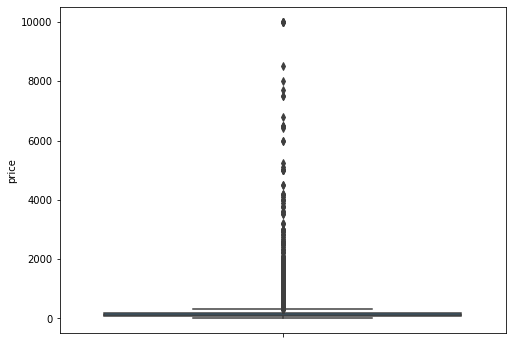

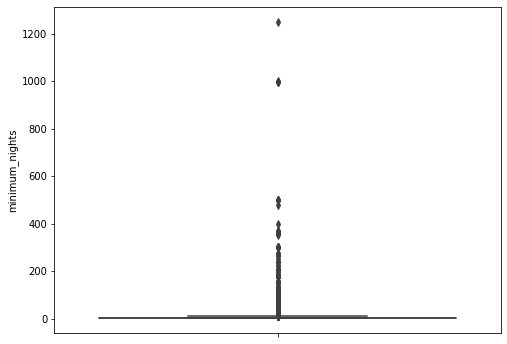

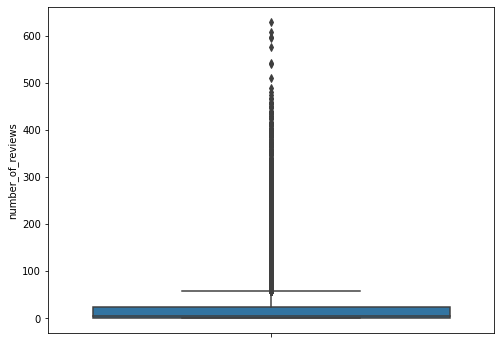

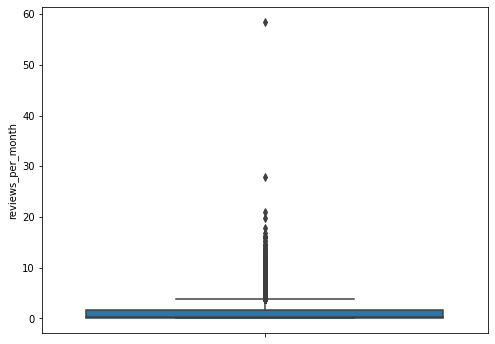

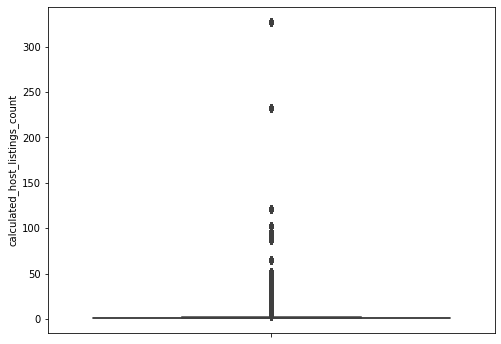

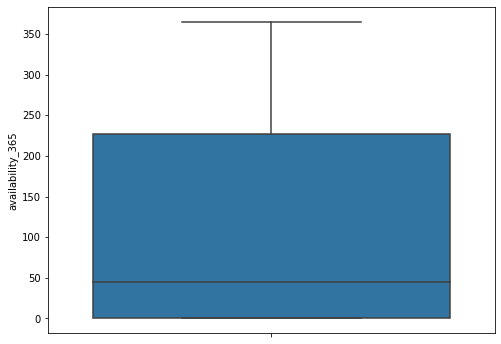

In [73]:
# Checking the variables with outliers

for col in features_to_be_analysed:
  plt.figure(figsize=[8,6])
  sns.boxplot(y = new_air_df[col])
  plt.ylabel(col)

In [56]:
# Cleaned dataset

new_air_df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


As we have successfully removed all null values from the data, we can now move to exploration of data.

# 3. Data Exploration and Visualization

## a. Host_name

First variable which we will be analysing is 'host_name'. 
Here, we are going to explore the behaviours of hosts.

In [57]:
# Total number of hosts availing Airbnb facilities

new_air_df.host_name.nunique()

11452

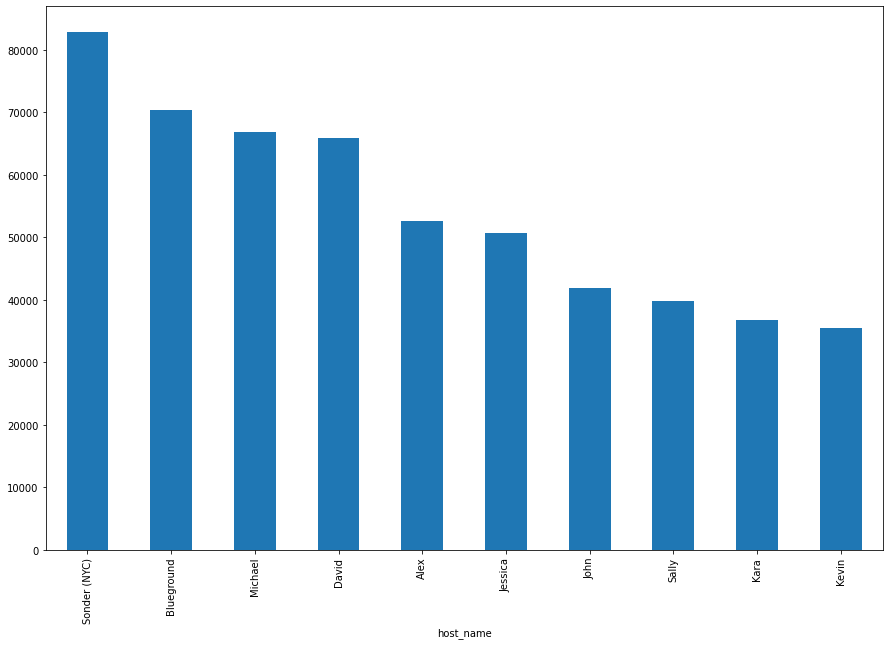

In [66]:
# Top 10 hosts which have higher spending value

top_10_affluent_hosts = new_air_df.groupby(['host_name'])['price'].sum().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=[15,10])
top_10_affluent_hosts.plot(kind= 'bar', ylabel= 'Total money spent', )